In [1]:
from fastai.tabular import *

In [2]:
path = 'C:/Users/Jorge Mejia/Desktop/analisis_de_las_variables_de_la_esquizotipia_con_deep_learning/analisis_con_dataset_original/'
path

'C:/Users/Jorge Mejia/Desktop/analisis_de_las_variables_de_la_esquizotipia_con_deep_learning/analisis_con_dataset_original/'

In [3]:
df = pd.read_csv(path + 'dataset_esquizotipia_original.csv')
df.head()

,ESTRES_PERCIBIDO,CSI_RESPROBL,CSI_REESTCOGN,CSI_APOYOSOC,CSI_EXPEMOC,CSI_EVITPROBL,CSI_PENSDESID,CSI_RETISOC,CSI_AUTOCRIT,ANSIEDADRASGO,...,SCL90_PSICOT,CAPE_POSIT_FREC,CAPE_POS_MALESTAR,CAPE_NEG_FREC,CAPE_NEG_MALESTAR,CAPE_DEPRE_FREC,CAPE_DEPRE_MALESTAR,TRAUMA_FRECUENCIA,TRAUMA_AFECTACION,SPQ_TOTAL_ESQUIZOT
0,23,17,5,0,0,7,5,13,2,20,...,0,24,4,14,0,8,0,4,8,0
1,22,13,11,3,10,6,11,17,11,17,...,9,22,2,29,33,11,3,9,29,0
2,10,20,20,20,16,11,8,3,0,20,...,5,30,9,29,21,10,2,12,25,1
3,7,12,1,0,7,4,6,3,1,18,...,0,20,0,16,2,8,0,4,10,0
4,31,8,9,17,13,4,14,2,6,27,...,17,35,13,36,26,19,19,17,48,2


In [4]:
procs = [FillMissing, Categorify, Normalize]

In [5]:
# se selecciona un 95% de los datos para entrenamiento y un 5% de los datos para validación
valid_idx  =  range ( len ( df ) - 14 ,  len ( df ))

In [6]:
# Se define la variable dependiente
dep_var  =  'SPQ_TOTAL_ESQUIZOT'

In [7]:
data = TabularDataBunch.from_df(path, df, dep_var, valid_idx=valid_idx, procs=procs)
print(data.train_ds.cont_names) # `cont_names` defaults to: set(df)-set(cat_names)-{dep_var}

['CSI_EVITPROBL', 'SCL90_OBS_COMP', 'CSI_EXPEMOC', 'CSI_AUTOCRIT', 'CSI_REESTCOGN', 'CAPE_NEG_MALESTAR', 'CSI_APOYOSOC', 'CSI_RESPROBL', 'CAPE_POS_MALESTAR', 'CSI_RETISOC', 'SCL90_ANSIE', 'CSI_PENSDESID', 'ESTRES_PERCIBIDO', 'SCL90_DEPRE', 'SCL90_IDEA_PARAN', 'CSL90_HOSTIL', 'CAPE_DEPRE_MALESTAR', 'CSL90_SENS_INT', 'SCL90_ANS_FOB', 'CAPE_NEG_FREC', 'SCL90_PSICOT', 'TRAUMA_AFECTACION', 'SCL90_SOMAT', 'CAPE_DEPRE_FREC', 'CAPE_POSIT_FREC', 'ANSIEDADRASGO', 'TRAUMA_FRECUENCIA']


In [8]:
(cat_x,cont_x),y = next(iter(data.train_dl))
for o in (cat_x, cont_x, y): print(to_np(o[:5]))

[0 0 0 0 0]
[[-1.448245  0.929971 -0.388701  1.764427 ...  0.579568 -0.763979  0.204195  1.131202]
 [ 0.773541  1.24922   1.163251  0.342956 ...  0.810039 -0.148269  1.891905 -0.35118 ]
 [-1.448245 -0.027778 -0.388701 -1.256199 ... -0.80326  -0.456124 -0.25609  -0.814424]
 [-0.781709 -0.134194 -0.582695 -0.900831 ... -0.572789 -0.302196 -0.102661  0.112064]
 [-0.337352 -0.453444  0.581269  1.764427 ... -0.80326  -0.456124  0.050767 -0.35118 ]]
[1 1 0 0 0]


In [9]:
learn = tabular_learner(data, layers=[100,50], metrics=accuracy)
learn.fit(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.950987,0.970156,0.785714,03:24
1,0.831347,0.827846,0.785714,03:11


CSI_EVITPROBL,SCL90_OBS_COMP,CSI_EXPEMOC,CSI_AUTOCRIT,CSI_REESTCOGN,CAPE_NEG_MALESTAR,CSI_APOYOSOC,CSI_RESPROBL,CAPE_POS_MALESTAR,CSI_RETISOC,SCL90_ANSIE,CSI_PENSDESID,ESTRES_PERCIBIDO,SCL90_DEPRE,SCL90_IDEA_PARAN,CSL90_HOSTIL,CAPE_DEPRE_MALESTAR,CSL90_SENS_INT,SCL90_ANS_FOB,CAPE_NEG_FREC,SCL90_PSICOT,TRAUMA_AFECTACION,SCL90_SOMAT,CAPE_DEPRE_FREC,CAPE_POSIT_FREC,ANSIEDADRASGO,TRAUMA_FRECUENCIA,target,prediction
-1.0039,0.0786,-0.3887,0.1653,-0.9595,1.8127,-0.2470,-0.0714,-0.2276,-0.6265,-0.3271,-0.0166,0.1234,-0.2235,-0.7037,-0.4140,0.2844,-0.7505,-0.6977,0.5755,-0.3070,-0.2028,-0.9533,0.1186,-0.4561,-0.7164,0.2974,0,0
-1.0039,-0.4534,-1.3587,0.5206,-1.5208,-1.4796,-1.2861,-0.6656,-0.9635,0.6452,0.6283,0.4857,-0.1164,0.3380,-0.8986,0.6772,-1.0727,-0.4794,-0.6977,-1.4384,-0.4418,-1.1951,0.9688,-1.0337,-1.0718,-0.1027,-1.1850,0,0
-0.5595,-1.0919,0.3873,-1.2562,1.2855,-1.2127,1.1384,1.5133,-0.8584,-0.6265,-0.8048,-2.0259,-1.0755,-1.0257,-0.8986,-0.8505,-0.3941,-1.0217,-0.6977,-1.1699,-0.7112,0.4174,-0.9533,-0.5728,-0.9179,-0.8698,2.0577,0,0
0.5514,0.0786,-0.1947,0.3430,0.5372,0.6559,-0.5934,0.1267,-0.2276,0.4332,0.1506,0.1508,-0.1164,0.0171,-0.1190,0.2407,0.4201,0.7406,0.5895,0.4413,-0.4418,-0.0787,-0.6650,-0.1118,-0.3022,-0.1027,0.1121,1,1
0.1070,-1.0919,-0.0007,-0.7231,-0.2112,-0.3229,1.1384,0.1267,-0.2276,-0.4145,-0.8048,-1.1887,-0.3562,-0.8653,-0.5088,-0.4140,0.1487,-0.2083,-0.3299,-0.3643,-0.5765,0.4174,-1.0494,-0.1118,-0.3022,0.2042,-0.2585,0,0


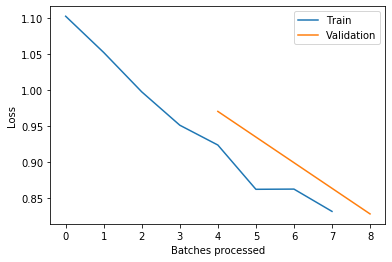

In [10]:
learn.recorder.plot_losses()
learn.show_results()